<!--BOOK_INFORMATION-->
<img align="left" style="width:80px;height:98px;padding-right:20px;" src="https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/pytorch-book-cover.jpg">

This notebook contains an excerpt from the [PyTorch Pocket Reference](http://pytorchbook.com) book by [Joe Papa](http://joepapa.ai); content is available [on GitHub](https://github.com/joe-papa/pytorch-book).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-papa/pytorch-book/blob/main/03_Deep_Learning_Development_with_PyTorch.ipynb)

In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.1.2+cu121
0.16.2+cu121


## Data Loading

In [2]:
from torchvision.datasets import CIFAR10

train_data = CIFAR10(root="./CIFAR10/train/",
                     train=True, 
                     download=True)

100%|██████████| 170498071/170498071 [01:45<00:00, 1614132.10it/s]


Extracting ./train/cifar-10-python.tar.gz to ./train/


In [3]:
print(train_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train


In [4]:
print("Length of train data:", len(train_data))
print("Shape of train data:", train_data.data.shape) # ndarray
# print("Targets:", train_data.targets) # list
print("Classes:", train_data.classes)
print("Classes to Index:", train_data.class_to_idx)

Length of train data: 50000
Shape of train data: (50000, 32, 32, 3)
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Classes to Index: {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [5]:
print(type(train_data[0]))
print(len(train_data[0]))

data, label = train_data[0]

<class 'tuple'>
2


In [6]:
print(type(data))
print(data)

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x1EC28E7FF50>


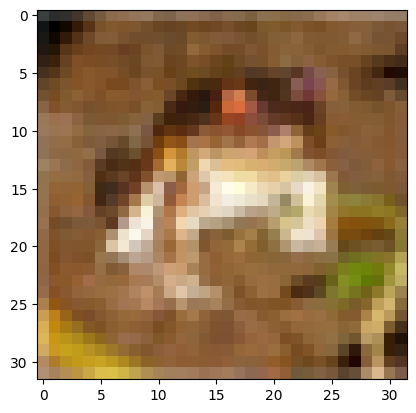

In [7]:
import matplotlib.pyplot as plt

plt.imshow(data)

In [8]:
print(type(label))
print(label)
print(train_data.classes[label])

<class 'int'>
6
frog


In [9]:
test_data = CIFAR10(root="./CIFAR10/test/", 
                    train=False, 
                    download=True)

print(test_data)
print(len(test_data))
print(test_data.data.shape) # ndarray

100%|██████████| 170498071/170498071 [01:47<00:00, 1589209.43it/s]


Extracting ./test/cifar-10-python.tar.gz to ./test/
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
10000
(10000, 32, 32, 3)


## Data Transforms

In [10]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.2023, 0.1994, 0.2010))])

train_data = CIFAR10(root="./CIFAR10/train/",
                    train=True, 
                    download=True,
                    transform=train_transforms)

Files already downloaded and verified


In [11]:
data, label = train_data[0]

In [13]:
print(data.shape) # (channels, height, width)

torch.Size([3, 32, 32])


In [15]:
# PIL expects (height, width, channels)
# plt.imshow(data)  # this will throw an error

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


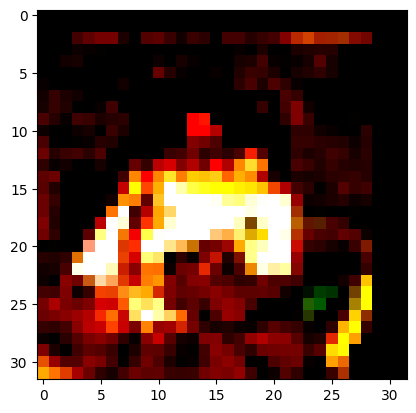

In [16]:
# move the channels dimension to the end
plt.imshow(data.permute(1, 2, 0))

In [17]:
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.2023, 0.1994, 0.2010))])

test_data = torchvision.datasets.CIFAR10(
      root="./CIFAR10/test/", 
      train=False, 
      transform=test_transforms)

## Data Batching

In [18]:
from torch.utils.data import DataLoader

In [19]:
trainloader = DataLoader(train_data, 
                         batch_size=16, 
                         shuffle=True)

In [20]:
data_batch, labels_batch = next(iter(trainloader))

In [21]:
print(data_batch.size())
print(labels_batch.size())

torch.Size([16, 3, 32, 32])
torch.Size([16])


In [22]:
testloader = DataLoader(test_data, 
                        batch_size=16, 
                        shuffle=False)

## Model Design



### Using Existing & Pre-trained models

In [23]:
from torchvision import models

In [26]:
vgg16 = models.vgg16(pretrained=True)

In [27]:
print(vgg16.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [ ]:
waveglow = torch.hub.load(
    'nvidia/DeepLearningExamples:torchhub', 
    'nvidia_waveglow')

Downloading: "https://github.com/nvidia/DeepLearningExamples/archive/torchhub.zip" to /root/.cache/torch/hub/torchhub.zip


In [ ]:
torch.hub.list('nvidia/DeepLearningExamples:torchhub')

Downloading: "https://github.com/nvidia/DeepLearningExamples/archive/torchhub.zip" to /root/.cache/torch/hub/torchhub.zip


['checkpoint_from_distributed',
 'nvidia_ncf',
 'nvidia_ssd',
 'nvidia_ssd_processing_utils',
 'nvidia_tacotron2',
 'nvidia_waveglow',
 'unwrap_distributed']

## The PyTorch NN Module (torch.nn)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2048, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64,2)

    def forward(self, x):
        x = x.view(-1, 2048)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        return x

In [ ]:
simplenet = SimpleNet()
print(simplenet)
# out:
# SimpleNet(
#   (fc1): Linear(in_features=2048, 
#                 out_features=256, bias=True)
#   (fc2): Linear(in_features=256, 
#                 out_features=64, bias=True)
#   (fc3): Linear(in_features=64, 
#                 out_features=2, bias=True)
# )

input = torch.rand(2048)
output = simplenet(input)

SimpleNet(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


## Training

In [ ]:
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # <1>
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = LeNet5().to(device=device)

### Fundamental Training Loop

In [ ]:
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), # <1>
                      lr=0.001, 
                      momentum=0.9)

In [ ]:
N_EPOCHS = 10 
for epoch in range(N_EPOCHS): # <1>

    epoch_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.to(device) # <2>
        labels = labels.to(device)

        optimizer.zero_grad() # <3>

        outputs = model(inputs) # <4>
        loss = criterion(outputs, labels) # <5>
        loss.backward() # <6>
        optimizer.step() # <7>

        epoch_loss += loss.item() # <8>
    print("Epoch: {} Loss: {}".format(epoch, 
                  epoch_loss/len(trainloader)))

# out: (results will vary and make take minutes)
# Epoch: 0 Loss: 1.8982970092773437
# Epoch: 1 Loss: 1.6062103009033204
# Epoch: 2 Loss: 1.484384165763855
# Epoch: 3 Loss: 1.3944422281837463
# Epoch: 4 Loss: 1.334191104450226
# Epoch: 5 Loss: 1.2834235876464843
# Epoch: 6 Loss: 1.2407222446250916
# Epoch: 7 Loss: 1.2081411465930938
# Epoch: 8 Loss: 1.1832368299865723
# Epoch: 9 Loss: 1.1534993273162841

Epoch: 0 Loss: 1.9328176640319825
Epoch: 1 Loss: 1.5952847471237184
Epoch: 2 Loss: 1.4674046397018432
Epoch: 3 Loss: 1.3846740203285217
Epoch: 4 Loss: 1.325514745130539
Epoch: 5 Loss: 1.2827296934509278
Epoch: 6 Loss: 1.251210474948883
Epoch: 7 Loss: 1.226371928281784
Epoch: 8 Loss: 1.1959582293987274
Epoch: 9 Loss: 1.179223330335617


Code Annotations:

<1> Our training loop

<2> Need to move inputs and labels to GPU is avail.

<3> Zero out gradients before each backprop or they'll accumulate

<4> Forward pass

<5> Compute loss

<6> Backpropagation, compute gradients

<7> Adjust parameters based on gradients

<8> accumulate batch loss so we can average over epoch


## Validation & Testing

### Splitting Training Dataset into Training & Validation Datasets

In [ ]:
from torch.utils.data import random_split

train_set, val_set = random_split(
                      train_data, 
                      [40000, 10000])

trainloader = torch.utils.data.DataLoader(
                    train_set, 
                    batch_size=16, 
                    shuffle=True)

valloader = torch.utils.data.DataLoader(
                    val_set, 
                    batch_size=16, 
                    shuffle=True)

print(len(trainloader))
# out: 2500
print(len(valloader))
# out: 625

2500
625


### Training Loop with Validation

In [ ]:
from torch import optim
from torch import nn

model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), 
                      lr=0.001, 
                      momentum=0.9)

In [ ]:
N_EPOCHS = 10
for epoch in range(N_EPOCHS):

    # Training 
    train_loss = 0.0
    model.train() # <1>
    for inputs, labels in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    val_loss = 0.0
    model.eval() # <2>
    for inputs, labels in valloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        val_loss += loss.item()

    print("Epoch: {} Train Loss: {} Val Loss: {}".format(
                  epoch, 
                  train_loss/len(trainloader), 
                  val_loss/len(valloader)))

# out: (results may vary and take a few minutes)
# Epoch: 0 Train Loss: 1.9876076080799103 Val Loss: 1.7407869798660278
# Epoch: 1 Train Loss: 1.6497538920879364 Val Loss: 1.5870195521354675
# Epoch: 2 Train Loss: 1.5117236899614335 Val Loss: 1.4355393668174743
# Epoch: 3 Train Loss: 1.408525426363945 Val Loss: 1.3614536597251892
# Epoch: 4 Train Loss: 1.3395055189609528 Val Loss: 1.2934591544151306
# Epoch: 5 Train Loss: 1.290560259628296 Val Loss: 1.245048282814026
# Epoch: 6 Train Loss: 1.2592685657382012 Val Loss: 1.2859896109580993
# Epoch: 7 Train Loss: 1.235161985707283 Val Loss: 1.2538409409046174
# Epoch: 8 Train Loss: 1.2070518508672714 Val Loss: 1.2157000193595886
# Epoch: 9 Train Loss: 1.189215132522583 Val Loss: 1.1833322570323943

Epoch: 0 Train Loss: 1.9950691596984864 Val Loss: 1.7358538597106934
Epoch: 1 Train Loss: 1.6696419578790664 Val Loss: 1.5826319568634033
Epoch: 2 Train Loss: 1.5508703550815581 Val Loss: 1.4990441875457763
Epoch: 3 Train Loss: 1.4702660526752471 Val Loss: 1.420825472354889
Epoch: 4 Train Loss: 1.4136667536258698 Val Loss: 1.362186644935608
Epoch: 5 Train Loss: 1.3608775995016098 Val Loss: 1.359514545917511
Epoch: 6 Train Loss: 1.3161776222586632 Val Loss: 1.3110978411197662
Epoch: 7 Train Loss: 1.2865340428471566 Val Loss: 1.3035572074890136
Epoch: 8 Train Loss: 1.2575521076202392 Val Loss: 1.2465155982017517
Epoch: 9 Train Loss: 1.2253268226146699 Val Loss: 1.2103867791175842


### Testing Loop

In [ ]:
num_correct = 0.0
for x_test_batch, y_test_batch in testloader:
  model.eval()
  y_test_batch = y_test_batch.to(device)
  x_test_batch = x_test_batch.to(device)
  y_pred_batch = model(x_test_batch)
  _, predicted = torch.max(y_pred_batch, 1)
  num_correct += (predicted == y_test_batch).float().sum()
  
accuracy = num_correct/(len(testloader)*testloader.batch_size) 

print(len(testloader), testloader.batch_size)
# out: 625 16

print("Test Accuracy: {}".format(accuracy))
# out: Test Accuracy: 0.6322000026702881

625 16
Test Accuracy: 0.5938000082969666


## Model Deployment

### Saving Models

In [ ]:
torch.save(model.state_dict(), "./lenet5_model.pt")

In [ ]:
model = LeNet5().to(device)
model.load_state_dict(torch.load("./lenet5_model.pt"))

<All keys matched successfully>

### Deploy to PyTorch Hub

In [ ]:
dependencies = ['torch']
from torchvision.models.vgg import vgg16

In [ ]:
dependencies = ['torch']
from torchvision.models.vgg import vgg16 as _vgg16

# vgg16 is the name of entrypoint
def vgg16(pretrained=False, **kwargs):
 """ # This docstring shows up in hub.help()
 VGG16 model
 pretrained (bool): kwargs, load pretrained
weights into the model
 """
 # Call the model, load pretrained weights
 model = _vgg16(pretrained=pretrained, **kwargs)
 return model